In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Load the Dataset

In [5]:

data = pd.read_csv('BikeSharingAssignment.csv')

1. Preprocessing the Data
1.1 Inspect the Dataset / Load and display the dataset.

In [3]:
print(data.head())
print(data.info())
print(data.describe())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-n

Check for missing values and duplicates

In [4]:
print("Missing values:\n", data.isnull().sum())
print("------------")
print("Duplicates:", data.duplicated().sum())

Missing values:
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
------------
Duplicates: 0


 1.2 Handle Missing Data


In [6]:
# Drop rows with missing values
#data.dropna(inplace=True)
#--------------------------------------
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Fill missing values for numeric columns
data[numeric_data.columns] = numeric_data.fillna(numeric_data.median())


1.3 Encode Categorical Variables

In [7]:
data = pd.get_dummies(data, columns=['season', 'holiday', 'workingday', 'weather'], drop_first=True)


2. Exploratory Data Analysis (EDA)
2.1 Analyze the Target Variable

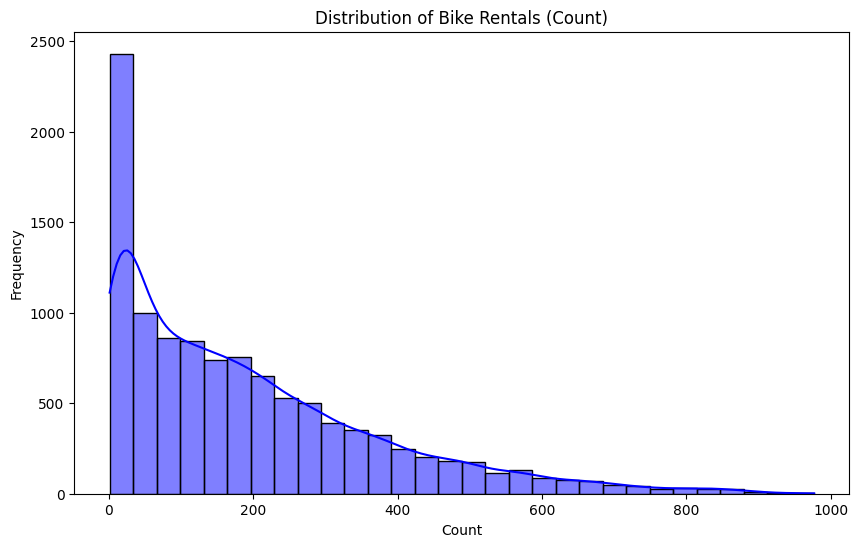

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Bike Rentals (Count)')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

The distribution of bike rental counts is right-skewed, with most rentals concentrated on the lower end of the scale (0-200 rentals).
A small number of cases involve significantly high rental counts, which could represent peak demand hours or special events.

2.2 Analyze Relationships
Scatter plot of temperature vs. count

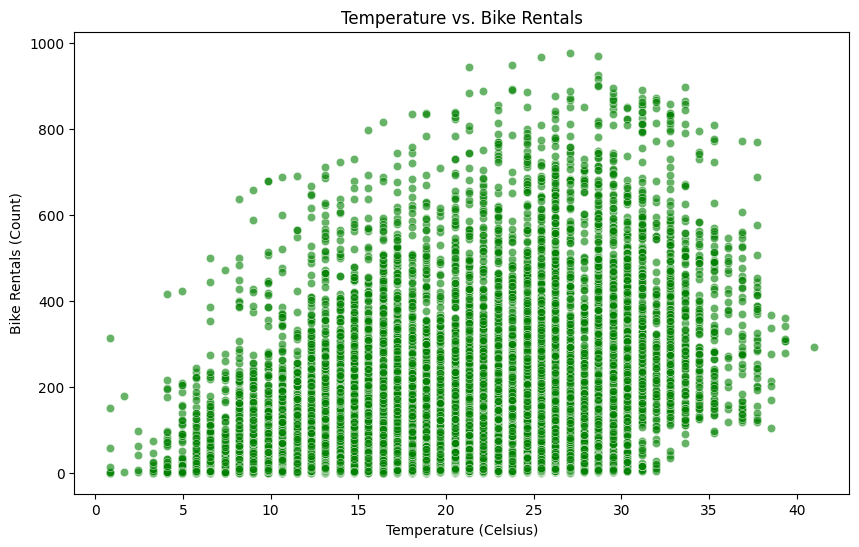

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='count', data=data, alpha=0.6, color='green')
plt.title('Temperature vs. Bike Rentals')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Bike Rentals (Count)')
plt.show()

A strong positive relationship is observed between temperature and bike rentals. Rentals increase with temperature up to a point (around 20-30°C), after which they plateau or slightly decline.

2.3 Correlation Analysis

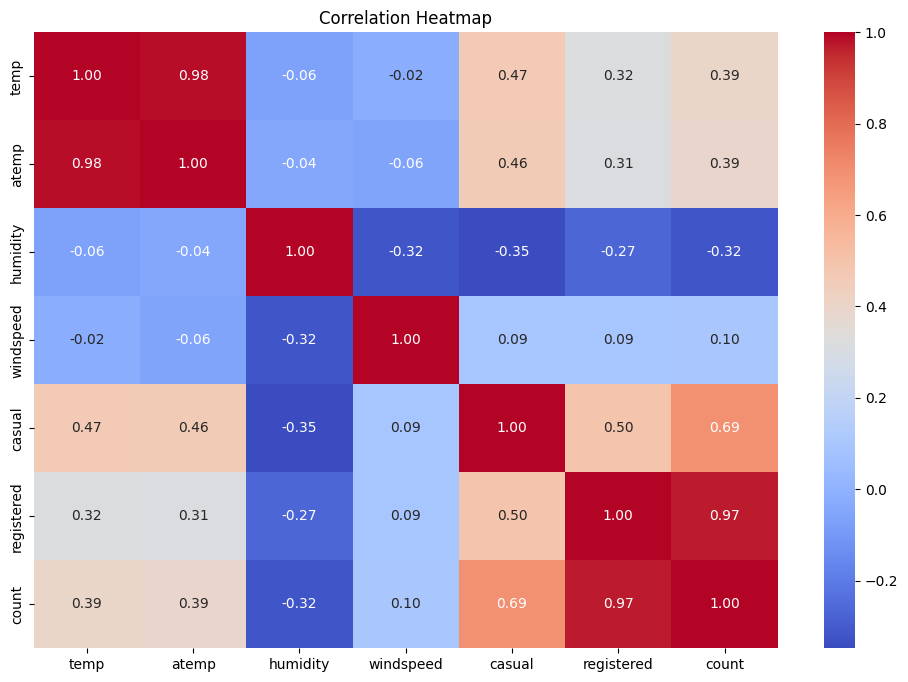

In [11]:
df_numeric = data.select_dtypes(include=['number'])
corr = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

High Correlation:
  `temp` and `atemp` have a very high positive correlation of 0.98, indicating they are nearly identical in capturing similar information.
  `registered` and `count` have a strong positive correlation of 0.97, suggesting `registered` significantly influences the total count.
  `casual` and `count` also show a strong positive correlation of 0.69.
Negative Correlation:
  `humidity` and `casual` have a negative correlation of -0.35, implying casual rentals decrease with higher humidity.
  `humidity` also negatively correlates with `count` (-0.32).
Weak Correlation:
  `windspeed` has weak correlations with most variables, indicating it may not significantly affect rentals.
  `temp` and `humidity` have weak correlations near zero.


3. Feature Engineering
3.1 Create New Features

In [13]:
data['hour'] = pd.to_datetime(data['datetime']).dt.hour
data['day'] = pd.to_datetime(data['datetime']).dt.dayofweek
data.drop(columns=['datetime'], inplace=True)

 3.2 Explain Feature Importance
 # The 'hour' feature is expected to improve the model because bike rental demand likely varies by time of day.


 4. Build and Evaluate a Linear Regression Model
 4.1 Train-Test Split

In [14]:
X = data.drop(columns=['count', 'casual', 'registered'])
y = data['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4.2 Train the Model

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

4.3 Evaluate the Model

In [16]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 107.59973998866981
RMSE: 146.580668994423
R2 Score: 0.3490491631605197


Plot Residuals

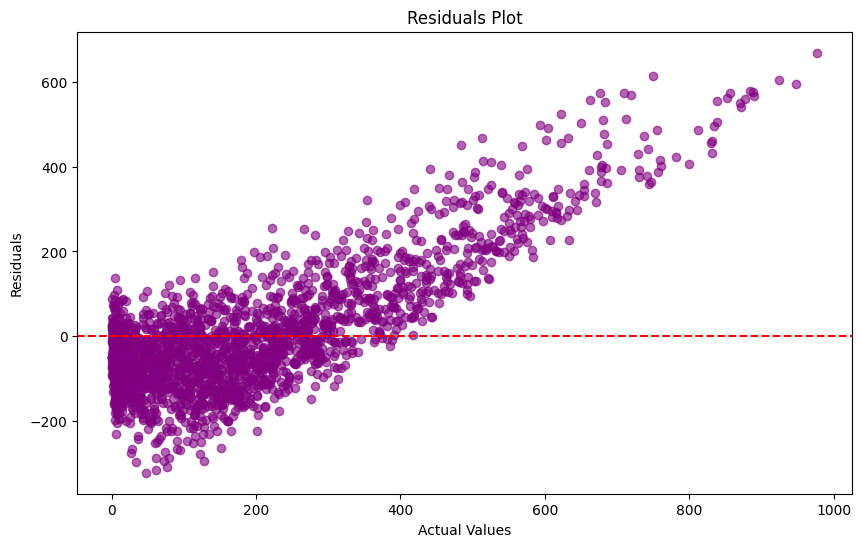

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - y_pred, alpha=0.6, color='purple')
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

The residuals are scattered around the horizontal line at 0, which is expected in a well-fitted model.
However, a clear pattern emerges where residuals fan out as the actual values increase, suggesting heteroscedasticity (variance of residuals is not constant).

Bonus: Visualize Actual vs. Predicted Values

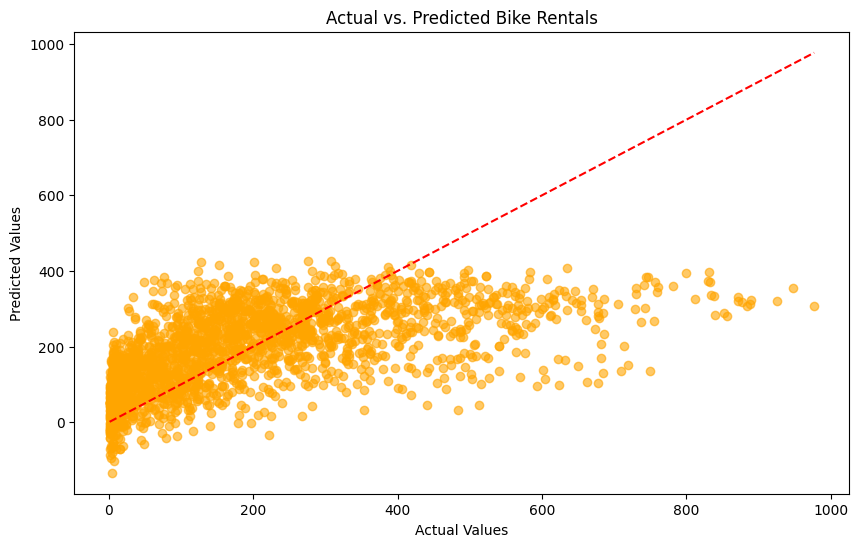

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Actual vs. Predicted Bike Rentals')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

The points generally cluster near the diagonal line, indicating the model performs reasonably well in most cases.
However, there is a noticeable spread, especially for higher actual values, suggesting **prediction error increases** as the target variable increases.Points below the diagonal indicate underprediction, while points above indicate overprediction.
